Luiz Henrique Dal'Berto<br>
10/15/2023

# ✧ API DATA REPORT ✧

## Hypothesis 

I will be analyzing a playlist comprising all the songs by my favorite artist, Lana Del Rey, and ranking them based on popularity and danceability. **I hypothesize that there is a correlation between the popularity and danceability of Lana Del Rey's songs; thus, the more 'danceable' a song is, the more popular it will be.**

To collect this data, I will be using Spotify's API endpoints focused on playlists and tracks. The primary endpoints I will be leveraging are:

**Get Playlist's Tracks:**
<ul>
    <li>Endpoint: https://api.spotify.com/v1/playlists/{playlist_id}</li>
    <li>This endpoint allows me to retrieve the list of tracks within a specific playlist.</li>
</ul>

**Get Audio Feautures for a Track**
<ul>
    <li>Endpoint: https://api.spotify.com/v1/audio-features/{id}</li>
    <li>This endpoint provides detailed audio features for a given track, including danceability.</li>
</ul>

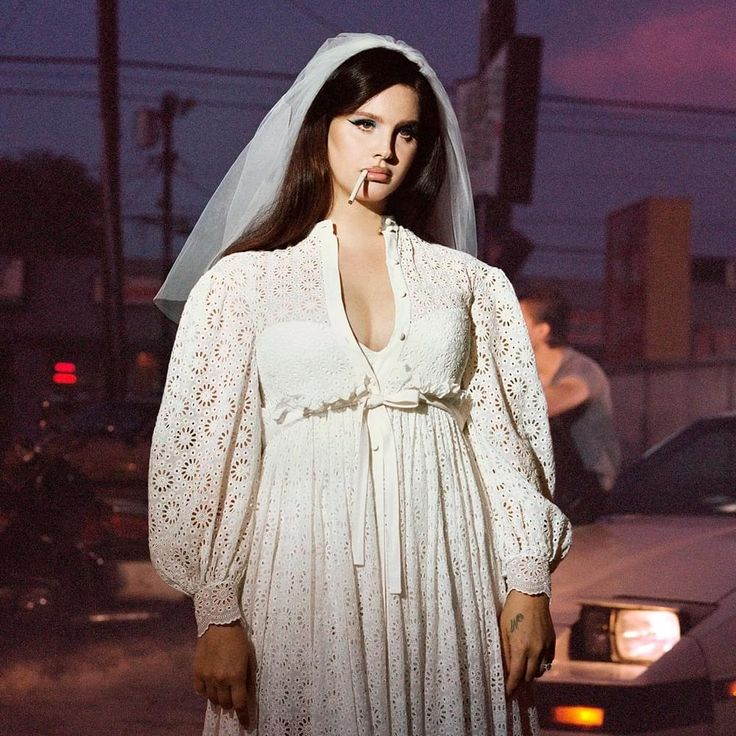
_Lana Del Rey_

<br>

### ➤ How is this data reliable?

This data is reliable because it is directly sourced from the official Spotify API, providing a solid foundation for analysis. Additionally, using proper authentication methods for my API requests adds an extra layer of security, ensuring that I am accessing authorized and accurate data.

### ➤ How is this data unreliable?

Despite its benefits, this data is unreliable because there may be a delay in reflecting real-time parameters, such as popularity, which are constantly shifting. Additionally, as there isn't an official Spotify playlist with all of Lana Del Rey's songs, user-generated playlists may offer less reliable information compared to official Spotify playlists.

### ➤ Limitations 

One limitation of this analysis is its reliance on the subjective metric of danceability. Spotify attempts to measure how 'danceable' a song is by considering elements such as tempo, rhythm stability, beat strength, overall regularity, and relative tempo. However, individual preferences may vary, making this measure highly subjective.

### ➤ Important Information 
The **popularity** score of a song is measured in the Spotify API in a scale of 0 to 100 where 0 indicates low popularity, and 1 indicates high popularity.

The **danceability** score in the Spotify API ranges from 0 to 1, where 0 indicates low danceability, and 1 indicates high danceability.
<hr>

In this portion of the code, I am importing the necessary Python libraries and modules to facillitate interactions with the Spotify API and data processing. 

In [478]:
import requests 
import pandas as pd 
import base64
import json 
import urllib

A CSV file containing Spotify API Keys is being read using Pandas and extracting the 'Client_ID' to attribute it to the variable 'Client_ID'

In [479]:
Client_ID = pd.read_csv('Spotify_Keys.txt')['Client_ID'].iloc[0]

A CSV file containing Spotify API Keys is being read using Pandas and extracting the 'Client_Secret' to attribute it to the variable 'Client_Secret'

In [480]:
Client_Secret = pd.read_csv('Spotify_Keys.txt')['Client_Secret'].iloc[0]

My 'Client_Secre' and 'Client_I' are being combined, encoded, and stored in the variable 'client_cre'

In [481]:
client_cred = base64.b64encode(str(Client_ID + ":" + Client_Secret).encode("ascii")) 

I wasn't sure of the exact function of this line of code, but after researching it's function, I found out that it is creating a set of headers for an HTTP request. It includes an "Authorization" header that contains my previously encoded client credentials for authentication when communicating with the Spotify API.

In [482]:
headers = {"Authorization": "Basic {}".format(client_cred.decode("ascii"))}

This line of code is setting up a payload with the grant type of 'client_credentials', indicating I am using client credentials flow for authentication. The 'url' variable is obtaining an access token from Spotify's endpoint

In [483]:
payload = {'grant_type' : 'client_credentials'}
url = 'https://accounts.spotify.com/api/token'

This line of code makes a post request from the Spotify endpoint 'url' with 'payload' and 'headers'. The reponse from this request is being stored in the variable 'session_key_response'

In [484]:
session_key_response = requests.post(url = url, data = payload, headers = headers)

This line of code checks the status of the request. A response status of '200' indicates that the request was successfully granted

In [485]:
session_key_response.status_code

200

This line of code extracts the JSON content from the response obtained by 'session_key_respons' and stores the information in the variable 'session_key_headers'

In [486]:
session_header_key = session_key_response.json()

'access_toke' is being extracted from the JSON content stored in the 'session_header_ke' variable and assigning it to the variable 'key'

In [487]:
key = session_header_key['access_token']

'session_headers' stores and formats key as a bearer token, which allows it to be used in future requests to the Spotify API to authenticate and access their data. 

In [488]:
session_headers = {"Authorization": "Bearer {}".format(key)}

The ID to the playlist with all Lana Del Rey's songs is being attributed to the variable 'lanasongs_id'

In [489]:
lanasongs_id = '4MiwuUidxQmZSratRYHLpT'

To access information about the playlist containing Lana Del Rey's songs, a url connected with the variable  'lanasongs_i' is created to retrieve information from the Spotify API

In [490]:
playlist_url = 'https://api.spotify.com/v1/playlists/{}'.format(lanasongs_id)

this line of code makes a GET request to the Spotify API endpoint and stores it in the variable''response' 

In [491]:
response = requests.get(url = playlist_url, headers = session_headers)

A response status of '200' indicates that the request was successfully granted

In [492]:
response.status_code

200

This line of code converts the response obtained from the Spotify API into a Python dictionary and stores the dictionary in the variable data 

In [493]:
data = json.loads(response.text)

Shows the available information in the Spotify API response for the playlist

In [494]:
data.keys()

dict_keys(['collaborative', 'description', 'external_urls', 'followers', 'href', 'id', 'images', 'name', 'owner', 'primary_color', 'public', 'snapshot_id', 'tracks', 'type', 'uri'])

Shows the available attributes withing 'tracks' section contained within the 'data' dictionary 

In [495]:
data['tracks'].keys()

dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])

A Pandas DataFrame is being created using the information from each track in the playlist and being stored in the 'playlist_df' variable 

In [496]:
playlist_df = pd.DataFrame ([x['track'] for x in data['tracks']['items']])

Displays the first 5 elements of the created DataFrame

In [497]:
playlist_df.head(5)

,album,artists,available_markets,disc_number,duration_ms,episode,explicit,external_ids,external_urls,href,id,is_local,name,popularity,preview_url,track,track_number,type,uri
0,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"[AR, AU, BO, BR, BG, CL, CO, CR, CY, CZ, DO, E...",1,299933,False,False,{'isrc': 'GBUM71111530'},{'spotify': 'https://open.spotify.com/track/3u...,https://api.spotify.com/v1/tracks/3uUCgL0cbSd0...,3uUCgL0cbSd0isnqhHCm1f,False,Off To The Races,66,None,True,2,track,spotify:track:3uUCgL0cbSd0isnqhHCm1f
1,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"[AR, AU, BO, BR, BG, CL, CO, CR, CY, CZ, DO, E...",1,209440,False,True,{'isrc': 'GBUM71111620'},{'spotify': 'https://open.spotify.com/track/4R...,https://api.spotify.com/v1/tracks/4RyK6N4IQ85x...,4RyK6N4IQ85xxLgguQAFH5,False,Blue Jeans,71,None,True,3,track,spotify:track:4RyK6N4IQ85xxLgguQAFH5
2,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"[AR, AU, BO, BR, BG, CL, CO, CR, CY, CZ, DO, E...",1,281960,False,False,{'isrc': 'GBUM71111621'},{'spotify': 'https://open.spotify.com/track/0f...,https://api.spotify.com/v1/tracks/0fBSs3fRoh1y...,0fBSs3fRoh1yJcne77fdu9,False,Video Games,79,None,True,4,track,spotify:track:0fBSs3fRoh1yJcne77fdu9
3,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"[AR, AU, BO, BR, BG, CL, CO, CR, CY, CZ, DO, E...",1,222920,False,False,{'isrc': 'GBUM71111528'},{'spotify': 'https://open.spotify.com/track/2v...,https://api.spotify.com/v1/tracks/2vtmY2mSccRz...,2vtmY2mSccRzKGjtcHSzI3,False,Diet Mountain Dew,80,None,True,5,track,spotify:track:2vtmY2mSccRzKGjtcHSzI3
4,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"[AR, AU, BO, BR, BG, CL, CO, CR, CY, CZ, DO, E...",1,230520,False,False,{'isrc': 'GBUM71111567'},{'spotify': 'https://open.spotify.com/track/7c...,https://api.spotify.com/v1/tracks/7cNz65PfCatR...,7cNz65PfCatRXoX7QtqM2A,False,National Anthem,74,None,True,6,track,spotify:track:7cNz65PfCatRXoX7QtqM2A


Creates a new DataFrame based on the previous DataFrame 'playlist_df' by using specific columns and storing it on the variable 'playlist_pop'

In [498]:
playlist_pop = playlist_df[['name', 'popularity', 'id']]

Displays the DataFrame and ranks its top 20 by popularity  

In [499]:
playlist_pop.sort_values('popularity', ascending = False).head(20)

,name,popularity,id
13,Summertime Sadness,87,3BJe4B8zGnqEdQPMvfVjuS
33,West Coast,86,5Y6nVaayzitvsD5F7nr3DV
88,Cinnamon Girl,85,2mdEsXPu8ZmkHRRtAdC09e
87,Doin' Time,84,0Oqc0kKFsQ6MhFOLBNZIGX
9,Radio,84,3taCbWWTilb7eNMsAzOBq4
27,Brooklyn Baby,84,1NZs6n6hl8UuMaX0UC0YTz
3,Diet Mountain Dew,80,2vtmY2mSccRzKGjtcHSzI3
61,Stargirl Interlude,80,4EDijkJdHBZZ0GwJ12iTAj
53,Art Deco,80,5jqNQZBwbZWQXPWfo0ygZF
29,Pretty When You Cry,80,6PnluwP0fjGnpIBsqTdUTq


Creates a comma-separated string to join the id values from two different DataFrames later 

In [500]:
','.join(list(playlist_df['id']))

'3uUCgL0cbSd0isnqhHCm1f,4RyK6N4IQ85xxLgguQAFH5,0fBSs3fRoh1yJcne77fdu9,2vtmY2mSccRzKGjtcHSzI3,7cNz65PfCatRXoX7QtqM2A,3I5azi0831uNpYQsfYsW7G,6qqdFWe7C4LsBjWbXQdsHA,4Ouhoi2lAhrLJKFzUqEzwl,7LQKuOaqJrNgVIGLFnfvdn,3taCbWWTilb7eNMsAzOBq4,1FaHPLv48VjsTkPCQOH7bv,1Lw2xRuW5fcieRPfoskgog,6g4RVB6qiuySTw9FCV1HEM,3BJe4B8zGnqEdQPMvfVjuS,4MDpkzAyG2X0dmtOU0ZESX,24h1notzzKOcLZSdRYa7yn,7yFMhCJOsH7khgpdnyrZAZ,1Yfgbr2kZrb3u0NP8ioyuk,5ZyM4VMzHSaz8OlIZRuZBH,5SzoFexynLVceTLggJTZZM,4uhSo9cVBVpdDCNxf4MBaP,2rldjI2fK6nYwlMgaITluf,7E8A5k5VOhPmt6pGPDJhxQ,2Za7Yhteh4XcUXnNYxTIHH,6ayKgleoMF26lvU1Z7wVm7,1y3r6RXiJZNBV1EI0NggpS,4VSg5K1hnbmIg4PwRdY6wV,1NZs6n6hl8UuMaX0UC0YTz,11MyiSGZSYSmhhqwGUTtAq,6PnluwP0fjGnpIBsqTdUTq,7Ms58r8G6Y0r1XLtpwoGxN,70Laus6ozJIHDpfTtUSmAZ,6IfPyMb0Sxptpx6jBUATOS,5Y6nVaayzitvsD5F7nr3DV,1KuVEZR4xuQVNr1KkanAV4,63hHlajVLQnlFMAqSyePxO,0vfPEfQk0ZCHExTZ007Ryr,0iQPnK3bi7O27c5T2HBTdr,5NIvNlH4kR1TbgkvPtwC5l,08tGuOLIGw5uxfMQGQhWtp,6n2VSIQs6R7Ri33yztX0T5,6JF5OEqj3bIEdoBTkHVACm,5Lr2qE0Nwl8XiqNwQzvrUJ,5FhSYoXPUa

Constructs the Spotify's URL endpoint to make a request to the Spotify API to obtain audio features from the playlist tracks

In [501]:
play_features_url = 'https://api.spotify.com/v1/audio-features?ids={}'.format(','.join(list(playlist_df['id'])))

Makes a GET request to the Spotify API using the url in 'play_features_ur' and executes the variable. As the response was 200, the request was successful 

In [502]:
features_response = requests.get(url = play_features_url, headers = session_headers)
features_response.status_code

200

Converts the JSON-formatted content in 'features_repons' into a Python dictionary and defines it as the variable features

In [503]:
features = features_response.json()

Creates a DataFrame using the obtained features of the tracks from the Spotify API

In [504]:
features_df = pd.DataFrame(features['audio_features'])

Displays the first five elements of the list from the created DataFrame 

In [505]:
features_df.head(5)

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.399,0.721,4,-5.562,0,0.0523,0.0621,0.002820,0.2780,0.113,160.125,audio_features,3uUCgL0cbSd0isnqhHCm1f,spotify:track:3uUCgL0cbSd0isnqhHCm1f,https://api.spotify.com/v1/tracks/3uUCgL0cbSd0...,https://api.spotify.com/v1/audio-analysis/3uUC...,299934,4
1,0.558,0.837,3,-4.405,1,0.0633,0.4180,0.000000,0.0821,0.488,117.963,audio_features,4RyK6N4IQ85xxLgguQAFH5,spotify:track:4RyK6N4IQ85xxLgguQAFH5,https://api.spotify.com/v1/tracks/4RyK6N4IQ85x...,https://api.spotify.com/v1/audio-analysis/4RyK...,209440,4
2,0.236,0.249,6,-9.595,0,0.0348,0.8110,0.000001,0.0870,0.181,72.847,audio_features,0fBSs3fRoh1yJcne77fdu9,spotify:track:0fBSs3fRoh1yJcne77fdu9,https://api.spotify.com/v1/tracks/0fBSs3fRoh1y...,https://api.spotify.com/v1/audio-analysis/0fBS...,281960,5
3,0.595,0.696,10,-5.921,0,0.0417,0.2760,0.000000,0.4110,0.533,88.013,audio_features,2vtmY2mSccRzKGjtcHSzI3,spotify:track:2vtmY2mSccRzKGjtcHSzI3,https://api.spotify.com/v1/tracks/2vtmY2mSccRz...,https://api.spotify.com/v1/audio-analysis/2vtm...,222920,4
4,0.532,0.899,0,-5.935,0,0.2440,0.5310,0.000146,0.0957,0.436,85.000,audio_features,7cNz65PfCatRXoX7QtqM2A,spotify:track:7cNz65PfCatRXoX7QtqM2A,https://api.spotify.com/v1/tracks/7cNz65PfCatR...,https://api.spotify.com/v1/audio-analysis/7cNz...,230520,4


Creates and displays a new DataFrame called 'play_dance' with the 'id' and 'danceability' features from the existing DataFrame ranked by the top 20 most 'danceable' songs

In [506]:
play_dance = features_df[['danceability', 'id']]
play_dance.sort_values('danceability', ascending = False).head(20)

,danceability,id
79,0.767,4JEhFF1J95HoXuuXkyxMyS
67,0.760,5QqyRUZeBE04yJxsD1OC0I
81,0.674,5DSi7heBC8eTIFROBvttnp
66,0.658,6eygbzyL6hY8jFQTARDuo9
87,0.641,0Oqc0kKFsQ6MhFOLBNZIGX
61,0.638,4EDijkJdHBZZ0GwJ12iTAj
80,0.623,69bW8sXMYTa2iwfoRyZT5Y
72,0.616,0dssTLrqY79Klk6jx2RXCj
6,0.600,6qqdFWe7C4LsBjWbXQdsHA
3,0.595,2vtmY2mSccRzKGjtcHSzI3


**✿Insight:** At this point, while comparing to the previous popularity Dataframe track numbers, it was already clear that the most danceable songs are not necessarily the most popular ones

Joins the DataFrames 'playlist_df' and 'features_df' by using the 'id' column as a key, and displays the first 5 elements of the DataFrame

In [507]:
joined_df = pd.merge(playlist_df, features_df, how = 'inner', on = 'id')
joined_df.head(5)

,album,artists,available_markets,disc_number,duration_ms_x,episode,explicit,external_ids,external_urls,href,...,instrumentalness,liveness,valence,tempo,type_y,uri_y,track_href,analysis_url,duration_ms_y,time_signature
0,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"[AR, AU, BO, BR, BG, CL, CO, CR, CY, CZ, DO, E...",1,299933,False,False,{'isrc': 'GBUM71111530'},{'spotify': 'https://open.spotify.com/track/3u...,https://api.spotify.com/v1/tracks/3uUCgL0cbSd0...,...,0.002820,0.2780,0.113,160.125,audio_features,spotify:track:3uUCgL0cbSd0isnqhHCm1f,https://api.spotify.com/v1/tracks/3uUCgL0cbSd0...,https://api.spotify.com/v1/audio-analysis/3uUC...,299934,4
1,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"[AR, AU, BO, BR, BG, CL, CO, CR, CY, CZ, DO, E...",1,209440,False,True,{'isrc': 'GBUM71111620'},{'spotify': 'https://open.spotify.com/track/4R...,https://api.spotify.com/v1/tracks/4RyK6N4IQ85x...,...,0.000000,0.0821,0.488,117.963,audio_features,spotify:track:4RyK6N4IQ85xxLgguQAFH5,https://api.spotify.com/v1/tracks/4RyK6N4IQ85x...,https://api.spotify.com/v1/audio-analysis/4RyK...,209440,4
2,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"[AR, AU, BO, BR, BG, CL, CO, CR, CY, CZ, DO, E...",1,281960,False,False,{'isrc': 'GBUM71111621'},{'spotify': 'https://open.spotify.com/track/0f...,https://api.spotify.com/v1/tracks/0fBSs3fRoh1y...,...,0.000001,0.0870,0.181,72.847,audio_features,spotify:track:0fBSs3fRoh1yJcne77fdu9,https://api.spotify.com/v1/tracks/0fBSs3fRoh1y...,https://api.spotify.com/v1/audio-analysis/0fBS...,281960,5
3,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"[AR, AU, BO, BR, BG, CL, CO, CR, CY, CZ, DO, E...",1,222920,False,False,{'isrc': 'GBUM71111528'},{'spotify': 'https://open.spotify.com/track/2v...,https://api.spotify.com/v1/tracks/2vtmY2mSccRz...,...,0.000000,0.4110,0.533,88.013,audio_features,spotify:track:2vtmY2mSccRzKGjtcHSzI3,https://api.spotify.com/v1/tracks/2vtmY2mSccRz...,https://api.spotify.com/v1/audio-analysis/2vtm...,222920,4
4,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"[AR, AU, BO, BR, BG, CL, CO, CR, CY, CZ, DO, E...",1,230520,False,False,{'isrc': 'GBUM71111567'},{'spotify': 'https://open.spotify.com/track/7c...,https://api.spotify.com/v1/tracks/7cNz65PfCatR...,...,0.000146,0.0957,0.436,85.000,audio_features,spotify:track:7cNz65PfCatRXoX7QtqM2A,https://api.spotify.com/v1/tracks/7cNz65PfCatR...,https://api.spotify.com/v1/audio-analysis/7cNz...,230520,4


Creates a DataFrame called 'playjoined_df' and joins''playlist_pop' and 'play_dance' on the 'id' colum'

In [508]:
playjoined_df = pd.merge(playlist_pop, play_dance, how = 'inner', on = 'id')

Sorts the DataFrame in descending order by the top 20 'danceable' songs

In [509]:
playjoined_df.sort_values('danceability' , ascending = False).head(20)

,name,popularity,id,danceability
79,Blue Madonna,54,4JEhFF1J95HoXuuXkyxMyS,0.767
67,Summer Bummer (feat. A$AP Rocky & Playboi Carti),68,5QqyRUZeBE04yJxsD1OC0I,0.760
81,Season Of The Witch,72,5DSi7heBC8eTIFROBvttnp,0.674
66,White Mustang,70,6eygbzyL6hY8jFQTARDuo9,0.658
87,Doin' Time,84,0Oqc0kKFsQ6MhFOLBNZIGX,0.641
61,Stargirl Interlude,80,4EDijkJdHBZZ0GwJ12iTAj,0.638
80,God Save Our Young Blood (with Lana Del Rey),44,69bW8sXMYTa2iwfoRyZT5Y,0.623
72,When The World Was At War We Kept Dancing,60,0dssTLrqY79Klk6jx2RXCj,0.616
6,Dark Paradise,74,6qqdFWe7C4LsBjWbXQdsHA,0.600
3,Diet Mountain Dew,80,2vtmY2mSccRzKGjtcHSzI3,0.595


# ✧ Conclusion ✧

## The Big Question:
## Was the hypothesis correct?
**A:** No, the hypothesis was incorrect. After analyzing the final DataFrame, which ranks Lana Del Rey's songs based on danceability and popularity together, it is clear that they are not correlated. A quick glance will show that the most 'danceable' song, "Blue Madonna," has a popularity score of 54 out of 100. 

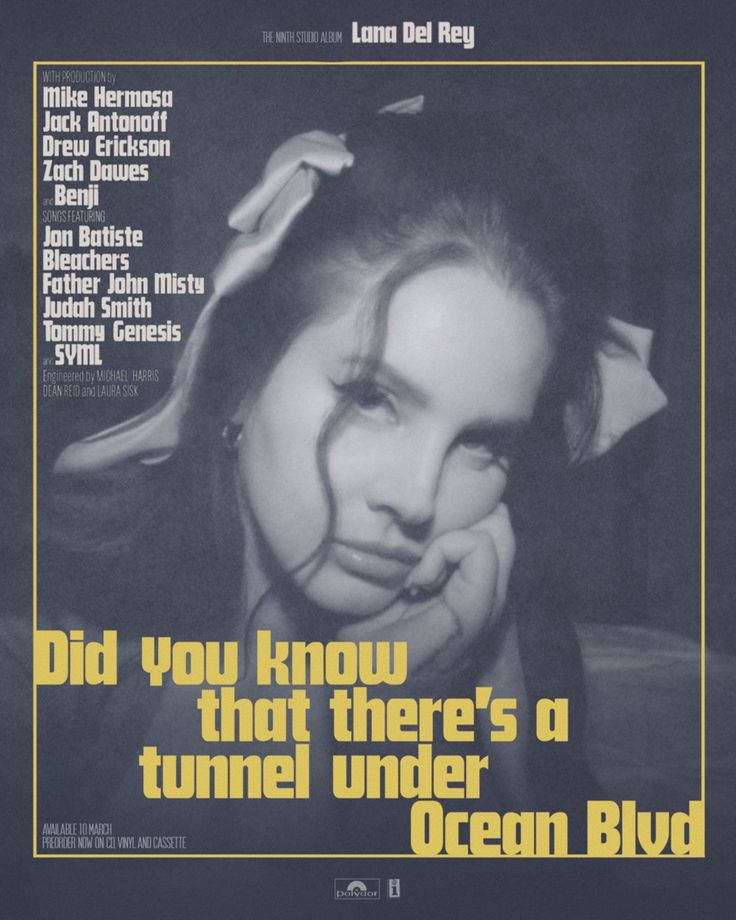

### ✧ Final Considerations ✧

In conclusion, Lana Del Rey's songs with the highest danceability are not correlated with their popularity. It is crucial to reflect on the limitations of this research, considering the subjectivity of the measure of danceability and how real-time metric delays can affect the accuracy of the analysis.

To enhance this research, here are alternative approaches and additional steps to deepen accuracy and credibility. As Lana Del Rey's songs span multiple genres, conducting genre analyses and comparing the relationship between danceability and popularity across different music genres could provide a better understanding of how each song fares in terms of danceability and popularity within its genre. Another approach could involve extending the study beyond Spotify by incorporating data from other platforms.